In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/sms_spam.csv')
data.shape

(5574, 2)

In [5]:
data.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.isnull().sum()

,0
type,0
text,0


In [9]:
data['text'].duplicated().sum()

414

In [10]:
data.groupby('type').describe() #no need to do data.duplicated()

text                                                               
     count unique                                                top freq
type                                                                     
ham   4827   4518                             Sorry, I'll call later   30
spam   747    642  Please call our customer service representativ...    4

In [11]:
data['text_len'] = data['text'].apply(len)
data.head()

,type,text,text_len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


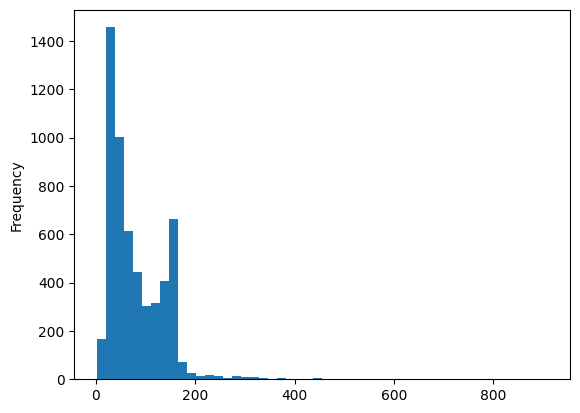

In [17]:
# distribution of text length
data['text_len'].plot(bins = 50, kind = 'hist')
plt.show()

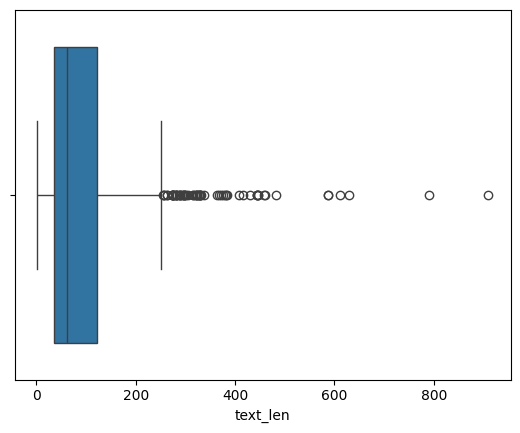

In [18]:
# boxplot of text length
sns.boxplot(x = data['text_len'])
plt.show()

In [19]:
data['text_len'].describe()

,text_len
count,5574.000000
mean,80.444923
std,59.841828
min,2.000000
25%,36.000000
50%,61.000000
75%,122.000000
max,910.000000


In [23]:
data[data['text_len'] == data['text_len'].min()]['text'].value_counts()

,count
text,
Ok,4
:),1


In [26]:
data[data['text_len'] == data['text_len'].max()]['text'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

## Text preprocessing

In [27]:
# list of stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [29]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [30]:
# function to remove punctuation and stopwords
def text_preprocessing(message):
  clean_text = ''.join([char for char in message if char not in string.punctuation])
  return [word for word in clean_text.split() if word not in stopwords.words('english')]

In [31]:
# encoding the labels
data['type'] = data['type'].map({'ham':0, 'spam':1})
data.head()

,type,text,text_len
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [32]:
x_train, x_test, y_train, y_test = train_test_split(data['text'],data['type'],test_size = 0.2, random_state = 42)

In [33]:
# Vectorization
vectorizer = TfidfVectorizer(stop_words = 'english')
x_train_tfid = vectorizer.fit_transform(x_train)
x_test_tfid = vectorizer.transform(x_test)
x_test_tfid

<1115x7463 sparse matrix of type '<class 'numpy.float64'>'
	with 7836 stored elements in Compressed Sparse Row format>

## NaiveBayes classifier

In [36]:
model = MultinomialNB()
model.fit(x_train_tfid, y_train)
print('Training accuracy: ', round(model.score(x_train_tfid,y_train)*100,2),'%')

Training accuracy:  98.23 %


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       954
           1       1.00      0.82      0.90       161

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



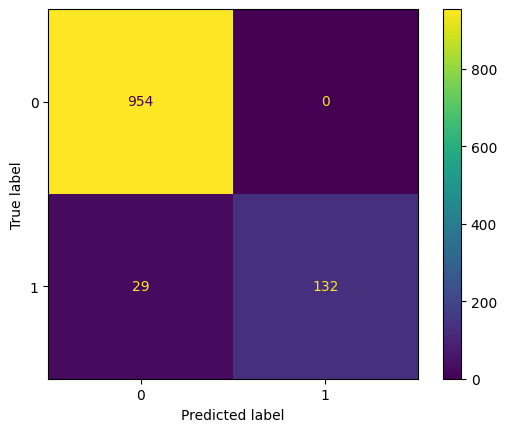

In [37]:
# model testing
y_pred = model.predict(x_test_tfid)

# metrics:
cm = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
report = classification_report(y_test, y_pred)
print(report)

In [44]:
# predicting realtime data
def predict_message():
  message = str(input('Enter a message: '))
  input_tfid = vectorizer.transform([message])
  prediction = model.predict(input_tfid)
  return 'The message is spam'if prediction[0] ==1 else 'The message is ham'

In [45]:
predict_message()

Enter a message: please contact out customer service representative to get exciting offers this festival season


'The message is spam '